In [1]:
from sklearn.datasets import load_iris


In [2]:
import pandas as pd

In [3]:
i = load_iris()
df = pd.DataFrame(i.data,columns=i.feature_names)

In [4]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [5]:
df.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [6]:
print(i['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
i.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
df['output']=i.target

In [9]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),output
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [10]:
X = df.drop(columns='output')
X[:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [11]:
y = df.output
y[:2]

0    0
1    0
Name: output, dtype: int32

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8)

In [14]:
X_train[:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
84,5.4,3.0,4.5,1.5
79,5.7,2.6,3.5,1.0


In [15]:
from sklearn.naive_bayes import BernoulliNB
bnb =  BernoulliNB()
bnb.fit(X_train,y_train)
bnb.score(X_train,y_train)*100

35.0

In [16]:
from sklearn.naive_bayes import MultinomialNB
mnb =  MultinomialNB()
mnb.fit(X_train,y_train)
mnb.score(X_train,y_train)*100

76.66666666666667

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb =  GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)*100

95.83333333333334

From above result we are going to continue with GaussianNB as it has the high score

In [18]:
##Test Phase

In [19]:
y_pred = gnb.predict(X_test)
y_pred[:5]

array([2, 1, 1, 0, 2])

In [20]:
y_test[:5]

108    2
76     1
90     1
24     0
141    2
Name: output, dtype: int32

# performance matrics


In [21]:
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 8,  0,  0],
       [ 0,  8,  0],
       [ 0,  2, 12]], dtype=int64)

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(51.0, 0.5, 'Actual')

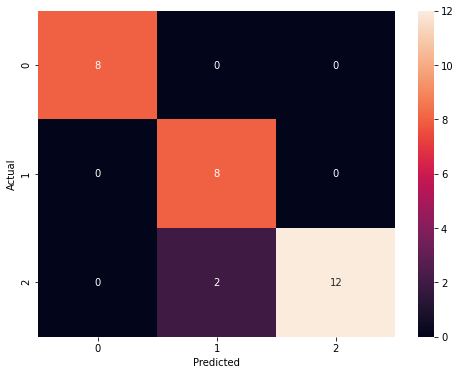

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [25]:
# column wise predict data
sum(y_pred==0)

8

In [26]:
# row wise Predict data
sum(y_test==1)

8

In [27]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.80      1.00      0.89         8
           2       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30

